# Synthetic Data Demo

*Authors: Carena Church, Enze Chen*

In this demo, we are going to use synethic data instead of materials science data.  The point of the demo is to gain a better intuition of the data analytics available on Citrination.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1: Generate Synthetic Data

In this case, we are going to generate data that has 4 clusters. There are four input columns in `x`. The output, `y`, has a different value for each cluster.  First, we will define two helper functions.

### `create_clusters`

In [2]:
def create_clusters(num_points=1000, num_features=2):
    """
    Create synthetic data with num_points total points and num_features input dimensionality.
    The points are grouped into four Gaussian-distributed clusters.
    """
    num_clusters = 4
    X = np.zeros((1, num_features))
    Y = np.zeros((1, 1))
    for i in range(num_clusters):
        x = np.random.randn(int(num_points/num_clusters), int(num_features))/6.0+i 
        X = np.vstack((X, x))
        y = np.ones((int(num_points/num_clusters), 1))*i
        Y = np.vstack((Y, y))
    return X, Y

### `write_cluster_csv`

In [3]:
def write_cluster_csv(filename, x, y):
    """
    Write the data to a csv file
    """
    data = np.hstack((x, y))
    num_features = x.shape[1]
    #  Let's define the header for the csv:
    str1 = ""
    for i in range(num_features):
        str1 += "x" + str(i) +","
    str1 += "y"
    #  Then write the csv:
    np.savetxt(filename, data, delimiter=',', header=str1, comments="", fmt="%.5e")

Now we will call our two helper functions above and plot the data.

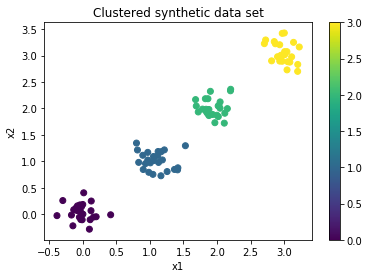

In [4]:
x, y = create_clusters(100, 4)
write_cluster_csv("cluster_data.csv", x, y)

# Lets make a plot to see how our data looks:
plt.scatter(x[:, 0], x[:, 1], c=y[:,0])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Clustered synthetic data set")
plt.colorbar()
plt.show()

## Step 2: Upload data

I uploaded this data set (`cluster_data.csv`) on https://citrination.com/add_data, using the `CSV Ingester` from the dropdown menu.

I specified that `x0`, `x1`, `x2`, `x3` and `y`are all properties and saved the data set here: https://citrination.com/datasets/151397.

## Step 3: Create a Data View

- Click on the **Data View** tab, and create a new data view.  Use the cluster data set that you just created.
- Include all columns (`x0`, `x1`, `x2`, `x3` and `y`)
- Specify that `x0`, `x1`, `x2`, `x3` are inputs, and `y` is an output
- Name and save your data view

## Step 4: Data Analytics

This view is instructive because we know where the data came from and how it was generated.
- If you click on the Reports tab, then on Data Summary, you can see the correlations plot and the t-SNE plot.
- The correlation plot shows the **Pearson correlation** between the inputs and the output `y`.
- The correlation plot shows that, as expected, `y` is correlated equally with all the inputs.  
- This plot is useful because it lets you know if your output is strongly related to any of your inputs.  One of its drawbacks is that it is designed to show *linear* correlations with *single* inputs, not non-linear relations with compositions of inputs.

![Correlation](correlation.png "Correlation")

We can also see that the **t-SNE plot** shows four clusters.  
- t-SNE is a dimensionality reduction method that is designed to preserve local distances.  In other words, points that are near each other before t-SNE should still be near each other when projected with t-SNE.  
- t-SNE is useful for visualizing high-dimensional data.  As you can see, t-SNE preserves the cluster structure.  In general, it can be difficult to understand underlying relations in high-dimensional data.  t-SNE is one useful visualization technique for understanding if there are underlying clusters or structures in your data.

![t-SNE](tsne.png "t-SNE")

- If we click on the Model Report tab, we can also see that all four inputs have more or less equal feature importance.  This feature importance is an indicator of how important each input was in building a model for the output.  
- The feature importance can be a useful scientific tool in discovering how the output relates to the input.  If a feature has zero importance, it could mean that the output is independent of that input.  If a few features are much more important than other features, then these importance metrics can provide physical intuition.
- In this case, the features all have equal importance because they were all treated equally when the synthetic data was generated. 
- We can also see that the model is able to very accurately predict the correct y value for this very structured data set.

![Results](results.png "Results")

The final data view is available at:
https://citrination.com/data_views/350/matrix_search?from=0.